# Problem:
Imagine you are working for a travel agency named "Wanderlust Adventures." Your team has been assigned a project to analyze and visualize the travel data for the past year. The data includes information about various destinations, the number of travelers per month, and the revenue generated. As the data analyst, you decide to use Matplotlib to create insightful visualizations. <br>
As a data analyst at "Wanderlust Adventures," you have been given a dataset containing monthly travel data for different destinations. The dataset includes information about the number of travelers and the revenue generated each month. Your task is to create three visualizations using Matplotlib: a line plot, a pie chart, and a scatter plot.

1.   <strong>Line Plot: </strong> Create a line plot using Matplotlib that illustrates the trend of both traveler count and revenue over the past year. The x-axis should represent the months, while the y-axis should represent the traveler count and revenue, respectively. The line plot should display two lines, one for traveler count and another for revenue, showcasing their trends over time.
2.   <strong>Pie Chart: </strong> Generate a pie chart using Matplotlib to display the distribution of traveler count among the top five destinations for the entire year. Each slice of the pie should represent a destination, and its size should correspond to the proportion of travelers visiting that particular destination.
3.  <strong>Scatter Plot: </strong> Create a scatter plot using Matplotlib that demonstrates the relationship between the number of travelers and the revenue generated for each month. Each data point on the scatter plot should represent a month, with the x-coordinate representing the traveler count and the y-coordinate representing the revenue generated.

<strong>Note:</strong> Use the file called "travel.csv"





In [1]:
#Please use the file travel.csv for the above
#The dataset is available at https://tinyurl.com/travelDataset

In [32]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime as dt
import numpy as np

In [5]:
raw_df = pd. read_csv("travel.csv")

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        120 non-null    object
 1   Destination  120 non-null    object
 2   Travelers    120 non-null    int64 
 3   Revenue      120 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.9+ KB


In [7]:
raw_df.head()

,Month,Destination,Travelers,Revenue
0,Jan,Paris,1000,150000
1,Jan,Rome,800,120000
2,Feb,Paris,1100,165000
3,Feb,Rome,900,135000
4,Mar,Paris,1200,180000


In [9]:
df = raw_df.groupby('Month').agg({'Travelers':'sum', 'Revenue':'sum'}).reset_index()

In [10]:
monthdf = pd.DataFrame({'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', "Dec"], 'value' : [x for x in range(0,12)]})
monthdf

,Month,value
0,Jan,0
1,Feb,1
2,Mar,2
3,Apr,3
4,May,4
5,Jun,5
6,Jul,6
7,Aug,7
8,Sep,8
9,Oct,9


In [11]:
df = pd.merge(df, monthdf, on = ['Month'], how = 'inner').sort_values(by = ['value'], ascending = True)

In [13]:
df.head()

,Month,Travelers,Revenue,value
4,Jan,9400,1410000,0
3,Feb,10350,1552500,1
7,Mar,11150,1672500,2
0,Apr,11800,1770000,3
8,May,11850,1777500,4


In [14]:
df['Revenue'] = df['Revenue']/100 #scaling down the values

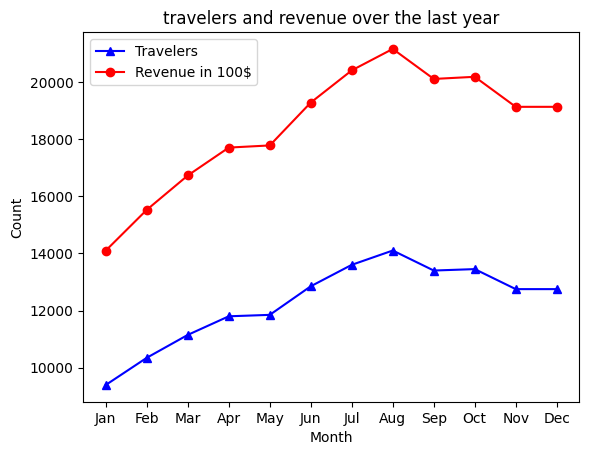

In [16]:
#line plot
plt.plot(df['Month'], df['Travelers'], label='Travelers', color='blue', marker='^')
plt.plot(df['Month'], df['Revenue'], label='Revenue in 100$', color='red', marker='o')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.title('travelers and revenue over the last year')
plt.show()

In [18]:
#pie graph
df_2=raw_df.groupby('Destination').agg({'Travelers':'sum', 'Revenue':'sum'}).reset_index()

In [23]:
df_2.sort_values(by=['Travelers'], ascending=False, inplace=True)

In [25]:
df_pie = df_2[0:5]

In [26]:
percentage = [int(x) for x in df_pie['Travelers']/df_pie['Travelers'].sum() * 100 ]

In [27]:
percentage

[29, 26, 15, 14, 14]

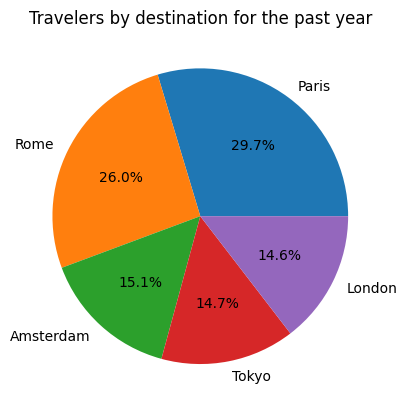

In [33]:
plt.pie(df_pie['Travelers'], labels=df_pie['Destination'], autopct=lambda x: f'{np.round(x,1)}%')
plt.title("Travelers by destination for the past year")
plt.show()

In [39]:
#Scatter-plot
df

,Month,Travelers,Revenue,value
4,Jan,9400,14100.0,0
3,Feb,10350,15525.0,1
7,Mar,11150,16725.0,2
0,Apr,11800,17700.0,3
8,May,11850,17775.0,4
6,Jun,12850,19275.0,5
5,Jul,13600,20400.0,6
1,Aug,14100,21150.0,7
11,Sep,13400,20100.0,8
10,Oct,13450,20175.0,9


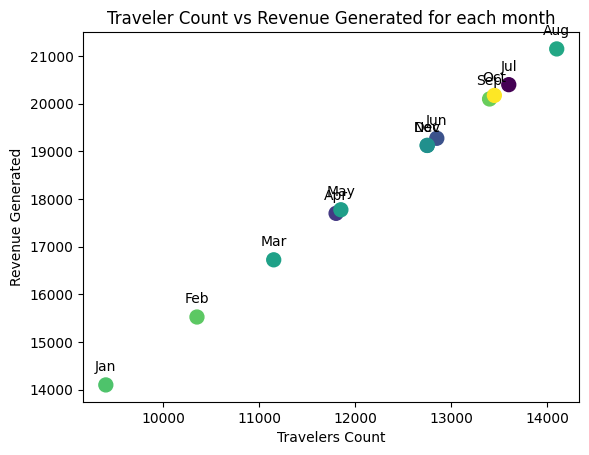

In [42]:
plt.scatter(df['Travelers'], df['Revenue'], c = np.random.rand(12), cmap = 'viridis', s=100)
for i in range(0,len(df)):
    plt.annotate(df['Month'][i], (df['Travelers'][i], df['Revenue'][i]), textcoords="offset points", xytext=(0, 10), ha='center')
plt.xlabel("Travelers Count")
plt.ylabel("Revenue Generated")
plt.title("Traveler Count vs Revenue Generated for each month")
plt.show()